In [1]:
import os

import aux_tools
% matplotlib inline
import matplotlib.pyplot as plt

def save_fig(fig_id, tight_layout=True, fig_extension="pdf", resolution=300):
    path = os.path.join(os.getcwd(), fig_id + "." + fig_extension)
    print(f"Saving figure {fig_id} to {path}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Using Centroids

In [2]:
# Load serialized dataframe

import pickle

import pandas as pd

# [86400, 21600, 7200, 3600, 900]

file = "df_900_0.3_v3.raw"

df = pickle.load(open(file, 'rb'))  # type: pd.DataFrame

#encode window
df['relative_day_position'] = df['relative_day_position'].apply(lambda x: int((x * 24) / 285))

#remove zeros
df = df[df['packet_count:mean'] != 0]

df = df[df.entity != 'np_windows10x86.raw']
df = df[df.entity != 'np_ubuntu.raw']


In [3]:
df.describe()

,packet_count:mean,packet_count:skew,packet_count:kurtosis,packet_count:var,ip_external:mean,ip_external:skew,ip_external:kurtosis,ip_external:var,ip_internal:mean,ip_internal:skew,...,wavelet_0,wavelet_1,wavelet_2,wavelet_3,wavelet_4,wavelet_5,wavelet_6,wavelet_7,wavelet_8,wavelet_9
count,24211.000000,24211.000000,24211.000000,24211.000000,24211.000000,24211.000000,24211.000000,24211.000000,24211.000000,24211.000000,...,2.421100e+04,24211.000000,24211.000000,24211.000000,24211.000000,24211.000000,24211.000000,24211.000000,24211.000000,24211.000000
mean,19.261102,3.520995,1.206012,9.829618,8.085287,0.239601,0.160389,0.063568,7370.569445,8754.299032,...,1.054881e-07,0.004323,0.004891,0.005058,0.005504,0.005909,0.006245,0.006679,0.007086,0.007942
std,17.376525,2.882928,0.411179,7.555432,11.359693,0.387261,0.180290,0.116047,31040.169194,14733.532469,...,9.534165e-08,0.003049,0.002555,0.001481,0.001402,0.001452,0.001472,0.001647,0.001805,0.002903
min,0.001111,0.001111,0.001111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.122976e-09,0.000136,0.000488,0.000656,0.000385,0.000826,0.001061,0.000839,0.000690,0.000557
25%,10.608333,1.282222,1.000000,5.410000,0.757778,0.043333,0.032222,0.013333,1248.917778,1049.348333,...,4.645828e-08,0.002377,0.003400,0.004131,0.004665,0.004997,0.005228,0.005515,0.005827,0.006005
50%,12.898889,2.203333,1.058889,9.042222,3.722222,0.114444,0.093333,0.033333,2986.207778,3920.926667,...,7.169420e-08,0.003394,0.004424,0.004963,0.005427,0.005817,0.006201,0.006629,0.007053,0.007577
75%,21.188333,6.273333,1.294444,11.918889,8.382222,0.274444,0.227778,0.071111,4356.306667,5492.562222,...,1.265121e-07,0.005354,0.005800,0.005863,0.006209,0.006694,0.007182,0.007761,0.008248,0.009388
max,176.181111,13.491111,3.273333,97.962222,162.067778,4.721111,2.312222,3.491111,749094.087778,208427.212222,...,1.763502e-06,0.031743,0.052417,0.021982,0.021836,0.025778,0.017516,0.017664,0.016140,0.036663


In [4]:
df['entity'].value_counts()

np_freebsd.raw    8931
np_nuc.raw        8501
np_tohiba.raw     3792
np_x58pc.raw      2987
Name: entity, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df,
                                   test_size=0.33,
                                   random_state=42)


In [6]:
import numpy as np

centroids = {}

for entity in X_train.entity.unique():
    mask = X_train[X_train['entity'] == entity]
    mask = mask.drop(columns=['entity'])

    features_mean = np.mean(mask.as_matrix(), axis=0)

    #print(f"Mean for entity {entity}: {features_mean}")

    centroids.update({entity: features_mean})


In [7]:
centroids

{'np_freebsd.raw': array([ 1.19438129e+01,  6.74818825e+00,  9.93532721e-01,  9.43838337e+00,
         2.47968440e+00,  2.54255825e-01,  2.65411677e-01,  4.76881092e-02,
         4.02928140e+03,  4.62909900e+03,  4.23280423e-04,  1.87540945e+00,
        -2.28126426e+00, -1.01540868e-01, -4.38727611e+00, -7.73760350e-01,
         1.12391345e+00,  3.56924570e+00,  6.79275870e+00,  9.03191228e+00,
         7.26672622e-01,  2.57759393e+00,  6.77045788e-02,  1.10653393e+00,
         1.59538181e+01,  4.45491215e-01,  1.02762960e+02,  1.63431825e+00,
         2.46863488e+00,  1.84980634e+01,  7.50698864e+01,  1.09232298e+02,
         8.84319850e-01,  2.04507497e+01, -1.12530956e+00,  2.26802510e+00,
         1.86532023e+00,  6.13630734e+00,  4.56126407e-03,  4.88326675e+00,
         3.89634769e+00,  4.46837915e-01,  6.52360687e-01,  8.80567018e-02,
         6.79319558e+06,  2.02920290e+07,  4.81735450e-02,  2.46978758e+00,
         6.90904094e+03,  1.16235589e+01,  1.67535505e+00,  1.40478391

In [8]:
hit = 0
miss = 0

for c, (index, series) in enumerate(X_test.iterrows()):

    values = series.drop('entity').as_matrix()
    
    dists = [np.sqrt(np.sum(np.square(values - centroids[c]))) for c in centroids]
    ndists = dists / np.sum(dists)
    testClass = np.argsort(dists)[0]

    name = series['entity']

    if list(centroids)[testClass] == name:
        hit = hit + 1
    else:
        miss = miss + 1


In [9]:
hit / (hit + miss)


0.6526908635794744

# Multivariate PDF 

In [10]:
# Load serialized dataframe

import pickle

import pandas as pd

# [86400, 21600, 7200, 3600, 900]

file = "df_900_0.3_v3.raw"

df = pickle.load(open(file, 'rb'))  # type: pd.DataFrame

#encode window
df['relative_day_position'] = df['relative_day_position'].apply(lambda x: int((x * 24) / 285))

#remove zeros
df = df[df['packet_count:mean'] != 0]

df = df[df.entity != 'np_windows10x86.raw']
df = df[df.entity != 'np_ubuntu.raw']

df_bk = df.copy()


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs = list(df.drop("entity", axis=1))  # numerical attributes

# numerical and categorical pipelines
num_pipeline = Pipeline([
    #('imputer', Imputer(strategy="median")),
    #('attribs_adder', CombinedAttributesAdder()),
    ('selector', aux_tools.DataFrameSelector(num_attribs)),
    ('std_scaler', StandardScaler()),
    #('robust_scaler', RobustScaler()),
])

sliding_window_pipeline = Pipeline([
    ('selector', aux_tools.DataFrameSelector('relative_day_position')),
    ('revel', aux_tools.DataFrameRevel()),
    ('cat_encoder', aux_tools.CategoricalEncoder(encoding="onehot-dense")),
])


In [12]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("sliding_window_pipeline", sliding_window_pipeline),
])


In [13]:
from sklearn.utils import shuffle

df = shuffle(df)

fulldata = full_pipeline.fit_transform(df)
cat_encoder = aux_tools.CategoricalEncoder(encoding="ordinal")
fulldata_labels = df['entity'].values.reshape(-1, 1)
fulldata_labels_ordinal = cat_encoder.fit_transform(fulldata_labels)


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
pca.fit(fulldata)
fulldata_pca = pca.transform(fulldata)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, labels_train, labels_test = train_test_split(fulldata_pca,
                                                              fulldata_labels_ordinal,
                                                              test_size=0.33,
                                                              random_state=42)


In [16]:
import numpy as np

means = {}
for c, _ in enumerate(cat_encoder.categories_[0]):
    pClass = (labels_train == c).flatten()
    means.update({c: np.mean(X_train[pClass, :], axis=0)})


In [17]:
covs = {}
for c, _ in enumerate(cat_encoder.categories_[0]):
    pClass = (labels_train == c).flatten()
    covs.update({c: np.cov(X_train[pClass, :], rowvar=0)})
# print(covs)


In [26]:
covs

{0: array([[1.84907036, 0.02172234],
        [0.02172234, 0.33215407]]), 1: array([[2.9726555 , 0.12479046],
        [0.12479046, 2.98057929]]), 2: array([[ 6.55653835, -8.11377329],
        [-8.11377329, 27.33911658]]), 3: array([[ 5.10878238, -1.33077965],
        [-1.33077965,  1.13207495]])}

In [18]:
from scipy.stats import multivariate_normal

for i, observation in enumerate(X_test):

    probs = np.array([])
    
    for entity in range(0, len(covs)):
        probs = np.append(probs, multivariate_normal.pdf(observation, means[entity], covs[entity]))

    testClass = np.argsort(probs)[-1]

    if testClass == labels_test[i]:
        hit = hit + 1
    else:
        miss = miss + 1


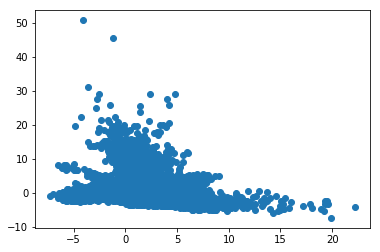

In [25]:
plt.plot(fulldata_pca[:,0],fulldata_pca[:,1],'o')

In [19]:
hit / (hit + miss)

0.6973717146433042

In [20]:
[aux_tools.labnames[x] for x in list(cat_encoder.categories_[0])]

['Lab-D', 'Lab-A', 'Lab-C', 'Lab-B']